In [ ]:
!pip install torchmetrics

     |████████████████████████████████| 408 kB 8.1 MB/s 


In [ ]:
!pip install seqeval

     |████████████████████████████████| 43 kB 1.6 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=e158118f4c9d76f647b1bd4143a9d240a6bfb3f4e0ffc9450d18ab4212ee81e8
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
from seqeval.metrics import classification_report

In [100]:
from sklearn.decomposition import PCA
from torch import FloatTensor as FT
from torch import LongTensor as LT
import matplotlib.pyplot as plt
import torch.nn as nn
import collections
import numpy as np
import torch
import json
import os
import re
import pandas as pd

from torch import tensor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import gensim.downloader
from gensim.models import KeyedVectors

from torchmetrics.classification import F1Score
from torchmetrics.classification import Accuracy

# for cute iteration bars (during training etc.)
from tqdm.auto import tqdm

from random import randint

import torch
from torch.utils.data import Dataset, DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

RD_SEED =213142

torch.manual_seed(RD_SEED)
np.random.seed(RD_SEED)

torch.backends.cudnn.deterministic = True
from gensim.models import word2vec

import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk import corpus

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Data visualisation

In [ ]:
!git clone https://github.com/SapienzaNLP/nlp2022-hw1

Cloning into 'nlp2022-hw1'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 11), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data.zip (Unzipped Files)/train.tsv', sep='\t' )
data_val = pd.read_csv('/content/drive/MyDrive/data.zip (Unzipped Files)/dev.tsv', sep='\t' )
dataset = pd.DataFrame(data).sample(frac=1, random_state = RD_SEED)
validation = pd.DataFrame(data_val)

In [ ]:
print(dataset[dataset.columns[0]].value_counts().index.drop('#').tolist())

['the', '.', ',', 'of', 'in', 'and', 'a', 'to', 'was', 'is', 'by', 'he', ')', '(', 'for', 'it', 'on', 'with', 'as', 'from', '–', 'his', 'at', 'an', 'also', ':', 'that', 'has', 'film', "'s", 'were', 'are', 'she', 'first', 'this', 'which', 'one', 'its', 'or', 'national', 'new', 'university', 'her', 'be', 'two', '/', 'their', 'had', 'after', 'company', 'album', 'series', 'but', 'used', 'they', 'game', 'released', 'all', 'been', 'city', 'based', 'born', ';', 'later', 'time', 'who', 'league', 'into', 'played', 'song', '2', 'season', 'united', 'not', 'have', 'other', 'made', '%', 'music', 'three', 'year', 'such', 'most', 'years', 'then', '3', 'up', 'school', 'part', 'where', 'during', 'party', 'became', 'television', '4', 'states', 'some', 'known', 'band', 'north', 'records', 'there', 'many', 'when', 'over', 'south', 'can', 'area', 'team', 'east', 'since', 'including', '10', 'member', '6', 'only', '1', 'between', 'town', 'through', 'club', '&', 'before', 'station', 'world', 'york', 'worked',

In [ ]:
#x=Dataset(dataset, window_size = 121, vocab_size = 10000)
#print(x.vocab[:100])

In [ ]:
Vocab_size = 10000

All_words = dataset['#'].value_counts().index.drop('#').tolist()
Vocab = All_words[:Vocab_size] 

print(Vocab)

['the', '.', ',', 'of', 'in', 'and', 'a', 'to', 'was', 'is', 'by', 'he', ')', '(', 'for', 'it', 'on', 'with', 'as', 'from', '–', 'his', 'at', 'an', 'also', ':', 'that', 'has', 'film', "'s", 'were', 'are', 'she', 'first', 'this', 'which', 'one', 'its', 'or', 'national', 'new', 'university', 'her', 'be', 'two', '/', 'their', 'had', 'after', 'company', 'album', 'series', 'but', 'used', 'they', 'game', 'released', 'all', 'been', 'city', 'based', 'born', ';', 'later', 'time', 'who', 'league', 'into', 'played', 'song', '2', 'season', 'united', 'not', 'have', 'other', 'made', '%', 'music', 'three', 'year', 'such', 'most', 'years', 'then', '3', 'up', 'school', 'part', 'where', 'during', 'party', 'became', 'television', '4', 'states', 'some', 'known', 'band', 'north', 'records', 'there', 'many', 'when', 'over', 'south', 'can', 'area', 'team', 'east', 'since', 'including', '10', 'member', '6', 'only', '1', 'between', 'town', 'through', 'club', '&', 'before', 'station', 'world', 'york', 'worked',

In [ ]:
print(dataset.head(40))
print('')
print(dataset['#'].describe())
print('')



                  #      id       0
108268       except       O     NaN
168330         yuen   I-PER     NaN
30895     syntactic       O     NaN
135686         city       O     NaN
147194         once       O     NaN
129487           of       O     NaN
150385          the       O     NaN
164338          the       O     NaN
18726          with       O     NaN
247064        paper       O     NaN
54284             ,       O     NaN
34928             #      id  2007.0
31183          mate   B-PER     NaN
252632           of       O     NaN
167618     sacristy       O     NaN
96998       however       O     NaN
81748             #      id  4720.0
100876           26       O     NaN
187258         full       O     NaN
236050          the       O     NaN
127020       fusion       O     NaN
152652      prevent       O     NaN
214524        cello       O     NaN
132277          the       O     NaN
48046           two       O     NaN
212019            a       O     NaN
47967   हिडिम्बभिद्       O 

In [ ]:
print(dataset['id'].describe())
print('')
print(dataset['id'].value_counts())

classes=['O', 'I-GRP', 'I-PER', 'I-CW', 'B-PER', 'B-LOC', 'B-CW', 'B-GRP',   'I-CORP',  'B-CORP',  'B-PROD',  'I-LOC','I-PROD']

freq = np.array(dataset['id'].value_counts())
freq = np.delete(freq, 1)
print(freq)


count     254592
unique        14
top            O
freq      192841
Name: id, dtype: object

O         192841
id         14534
I-GRP       6084
I-PER       5805
I-CW        5716
B-PER       5090
B-LOC       4556
B-CW        3551
B-GRP       3375
I-CORP      2987
B-CORP      2975
B-PROD      2770
I-LOC       2598
I-PROD      1710
Name: id, dtype: int64
[192841   6084   5805   5716   5090   4556   3551   3375   2987   2975
   2770   2598   1710]


In [ ]:
##Color maps for bar plot

def red_cmap(len):
  col = []
  for i in range(len):
    col.append([0.9**(i), 0.3, 0.6])
  return col  

def green_cmap(len):
  col = []
  for i in range(len):
    col.append([0.3, 0.9**i, 0.7])
  return col  

def blue_cmap(len):
  col = []
  for i in range(len):
    col.append([0.5, 0.6, 0.9**i])
  return col      

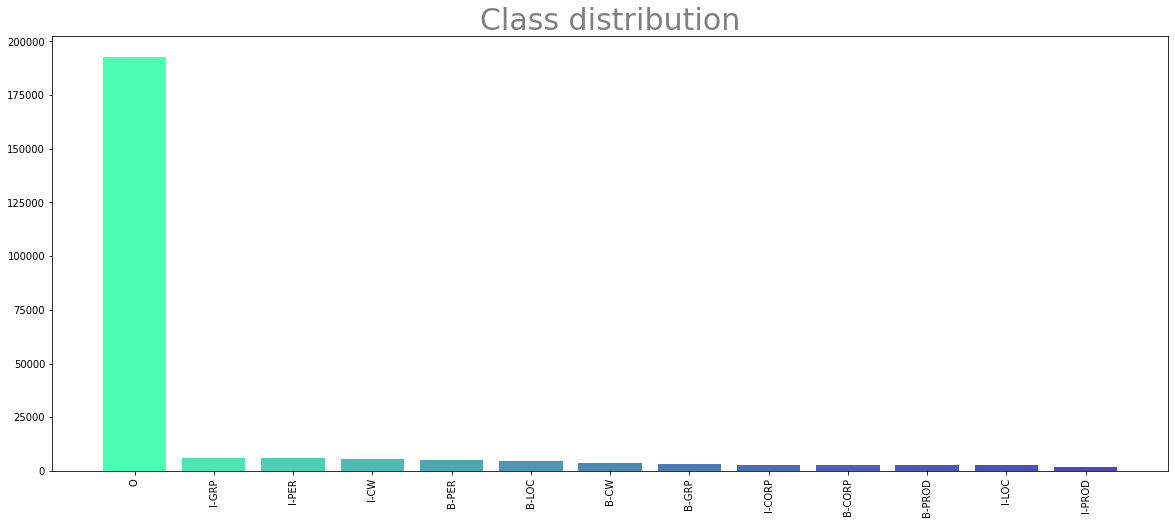

The class O is obviously dominant, let us make a plot without this class.


In [ ]:

plt.figure(figsize =(20, 8))
plt.title('Class distribution', color='grey', fontsize = 30)
plt.bar(range(len(classes)), freq, align="center", color = green_cmap(len(classes)), tick_label = classes)
plt.xticks(rotation=90)
plt.savefig('ClassDisWO.pdf')
plt.show()

print('The class O is obviously dominant, let us make a plot without this class.')

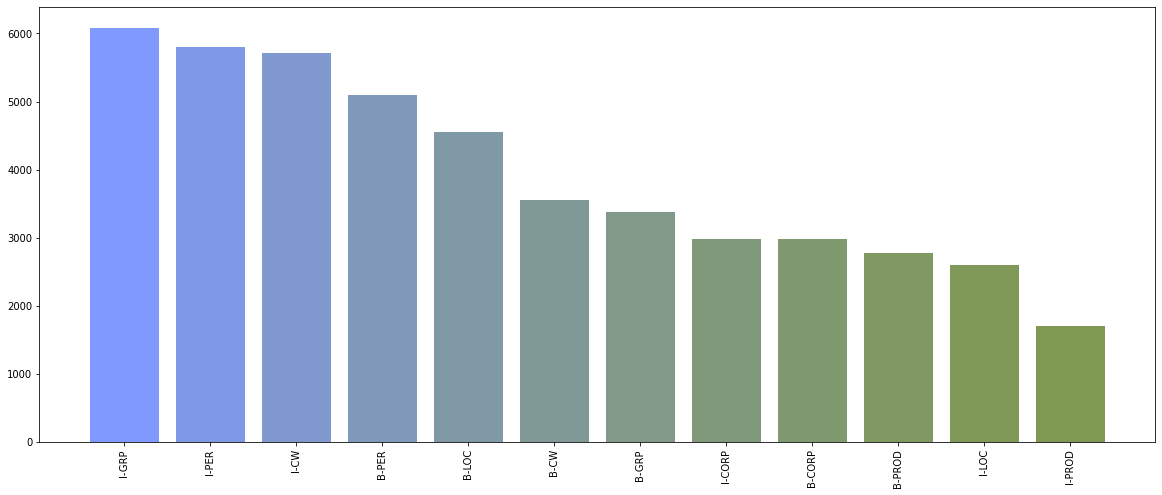

In [ ]:
col = []
for i in range(13):
  col.append([0.8**i , i*0.06, 1/(i+12)])

plt.figure(figsize =(20, 8))
plt.bar(range(len(classes[1:])), freq[1:], align="center", color = blue_cmap(len(classes[1:])), tick_label = classes[1:])
plt.xticks(rotation=90)
plt.savefig('ClassDistNoO.pdf')
plt.show()

In [ ]:
def get_words(data, classes):

  tot_word=[]
  words=[]
  for word in data:
    if not word=='#': words.append(word)
    else:
      tot_word.append(words)
      words=[]

  tot_labels = []
  labels=[]
  for lb in classes:
    if not lb=='id': labels.append(lb)
    else:
      tot_labels.append(labels)
      labels=[]

  return(pd.DataFrame(zip(tot_word, tot_labels)))

In [ ]:
train = get_words(dataset['#'].values, dataset['id'].values)

In [ ]:
print(train.head(20))

                                                    0  \
0   [except, yuen, syntactic, city, once, of, the,...   
1                       [mate, of, sacristy, however]   
2   [26, full, the, fusion, prevent, cello, the, t...   
3                                                  []   
4   [these, hunter, on, concert, argentina, mount,...   
5                                                  []   
6   [of, the, franco-belgian, put, also, and, it, ...   
7   [,, (i, conception, in, guildford, on, chanel,...   
8                       [and, series, oxford, edited]   
9   [interest, robards, taiwan, would, home, ., :,...   
10                                     [song, result]   
11       [finished, &, monastery, and, named, enough]   
12  [paul, analyzed, ., bottom, mcf, carved, 2000,...   
13  [the, cattle, an, charlotte, ncm, clearly, top...   
14  [and, they, billy, of, three, pantene, it, 199...   
15                                       [is, rating]   
16             [., ,, 20th, ag,

Index(['#', 'the', '.', ',', 'of', 'in', 'and', 'a', 'to', 'was', 'is', 'by',
       'he', ')', '(', 'for', 'it', 'on', 'with', 'as'],
      dtype='object')
[14534 13951 12554 10245  6962  6623  5535  5131  3298  3271  2697  2237
  2070  2050  2032  1997  1775  1717  1628  1587]


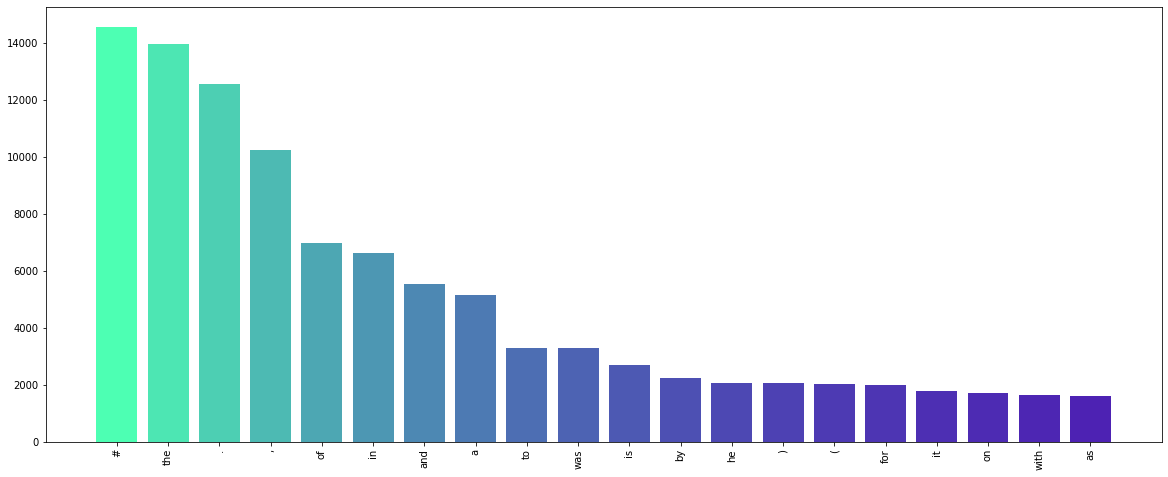

In [ ]:
wfreq = dataset['#'].value_counts()

print(wfreq.head(20).index)
print(np.array(wfreq.head(20)))
col=[]
for i in range(20):
  col.append([0.8**i , i*0.05, 1/(i+15)])

plt.figure(figsize =(20, 8))
plt.bar(range(20), np.array(wfreq.head(20)), align="center", color = green_cmap(20), tick_label = wfreq.head(20).index)
plt.xticks(rotation=90)
plt.show()

#Data processing


##Create vocabularies

In [ ]:
def clean(sentence):
  blabla = []
  for word in sentence:
    if  word is not None:
      blabla.append(word)
  return blabla    

In [ ]:

def create_vocab(dataset, vocab_len):
    PAD_TOKEN = "<pad>"
    UNK_TOKEN = "<unk>"
    vocab = {PAD_TOKEN: 0, UNK_TOKEN: 1}
    i=2
    for word in dataset[dataset.columns[0]].value_counts().index.drop('#').tolist():
      if word not in vocab and i < vocab_len:
        vocab[word] = len(vocab)
        i += 1
    return vocab

def label_dict(dataset):
    PAD_TOKEN = "<pad>" 
    label_dict = {PAD_TOKEN: 0}
    for label in dataset['id'].value_counts().index.drop('id').tolist():
      if label not in label_dict:
        label_dict[label] = len(label_dict)

    return label_dict

def create_es_vocab(data):
    PAD_TOKEN = "<pad>"
    UNK_TOKEN = "<unk>"
    vocab = {PAD_TOKEN: 0, UNK_TOKEN: 1}
    i = 2  
    for word in data:
      if word not in vocab:
        vocab[word] = len(vocab)
        i += 1
    print('Total number of words in vocabulary is : ', i)
    return vocab

def vocab_itos(data_index, vocab):
  words=[]
  for index in data_index:
    words.append(list(vocab.keys())[index])
  return words


In [ ]:
def load_torch_embedding_layer(weights: KeyedVectors, padding_idx: int = 0, freeze: bool = False):
  vectors = weights.vectors
  # random vector for pad
  pad = np.random.rand(1, vectors.shape[1])
  print(pad.shape)
  # mean vector for unknowns
  unk = np.mean(vectors, axis=0, keepdims=True)
  print(unk.shape)
  # concatenate pad and unk vectors on top of pre-trained weights
  vectors = np.concatenate((pad, unk, vectors))
  print(vectors.shape)
  # convert to pytorch tensor
  vectors = torch.FloatTensor(vectors)
  torch.save(vectors, 'glove_vectors.pt')

  # and return the embedding layer
  return torch.nn.Embedding.from_pretrained(vectors, padding_idx=padding_idx, freeze=freeze)

In [ ]:

label_vocabulary = label_dict(dataset)
print(label_vocabulary)

{'<pad>': 0, 'O': 1, 'I-GRP': 2, 'I-PER': 3, 'I-CW': 4, 'B-PER': 5, 'B-LOC': 6, 'B-CW': 7, 'B-GRP': 8, 'I-CORP': 9, 'B-CORP': 10, 'B-PROD': 11, 'I-LOC': 12, 'I-PROD': 13}


In [ ]:
ternary_vocab = {'<pad>': 0, 'O': 1, 'NE' :2}
print(ternary_vocab)

{'<pad>': 0, 'O': 1, 'NE': 2}


In [ ]:
weights = gensim.downloader.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
print(weights.vectors)

[[-0.038194 -0.24487   0.72812  ... -0.1459    0.8278    0.27062 ]
 [-0.10767   0.11053   0.59812  ... -0.83155   0.45293   0.082577]
 [-0.33979   0.20941   0.46348  ... -0.23394   0.47298  -0.028803]
 ...
 [ 0.36088  -0.16919  -0.32704  ...  0.27139  -0.29188   0.16109 ]
 [-0.10461  -0.5047   -0.49331  ...  0.42527  -0.5125   -0.17054 ]
 [ 0.28365  -0.6263   -0.44351  ...  0.43678  -0.82607  -0.15701 ]]


In [ ]:
glove_vocab = create_es_vocab(list(weights.vocab.keys()))
glove = load_torch_embedding_layer(weights).to('cuda')

Total number of words in vocabulary is :  400002
(1, 100)
(1, 100)
(400002, 100)


In [ ]:
list(glove_vocab.keys())[2]

'the'

##Word to index

In [ ]:
class Data2idx(Dataset):
    def __init__(self,
                 input_data: pd.DataFrame,
                 window_size: int,
                 word_vocab,
                 label_vocab,                
                 window_shift : int = -1,
                 device = 'cuda'):
    

      self.input_data = input_data
      self.window_size = window_size
      self.window_shift = window_shift if window_shift>0 else window_size
      self.device = device
      

      sentences = get_words(self.input_data['#'], self.input_data['id'])

      self.data = self.create_windows(sentences)
      
      self.label2idx_dict = label_vocab
      
      self.word2idx_dict = word_vocab
      self.ternary_vocab =  ternary_vocab = {'<pad>': 0, 'O': 1, 'NE' :2}
      self.encoded_data = None
      self.encoded_data_ter = None
      self.OriginalData_encoded = None
      self.OriginalData_encoded_ter = None
      self.index_data()
      self.index_data_ter()
      self.index_O_data(sentences)
      self.index_O_data_ter(sentences)
    def get_words(data, classes):
        tot_word=[]
        words=[]
        for word in data:
          if not word=='#': words.append(word)
          else:
            tot_word.append({words})
            words=[]
        
        tot_labels = []
        labels=[]
        for lb in classes:
          if not lb=='id': labels.append(lb)
          else:
            tot_labels.append({labels})
            labels=[]
        ble = pd.DataFrame(zip(tot_word, tot_labels)).rename(columns = {0:'sentences', 1:'label'} )  
        return ble

    def index_O_data(self, sentences):
        self.OriginalData_encoded = list()
        for i in range(len(sentences[0])):
          elem = sentences[0][i]
          encoded_elem = torch.LongTensor(self.encode_text(elem)).to(self.device)

          elem_label = sentences[1][i]
          encoded_labels = torch.LongTensor(self.encode_label(elem_label)).to(self.device)

          self.OriginalData_encoded.append({'inputs': encoded_elem,
                                           'outputs': encoded_labels})



    def index_O_data_ter(self, sentences):
        self.OriginalData_encoded_ter = list()
        for i in range(len(sentences[0])):
          elem = sentences[0][i]
          encoded_elem = torch.LongTensor(self.encode_text(elem)).to(self.device)

          elem_label = sentences[1][i]
          encoded_labels = torch.LongTensor(self.encode_ternary_label(elem_label)).to(self.device)

          self.OriginalData_encoded_ter.append({'inputs': encoded_elem,
                                           'outputs': encoded_labels})





    def index_data(self):
        self.encoded_data = list()
        for i in range(len(self.data)):
            # for each window
          elem = self.data[i]['sentence']
          encoded_elem = torch.LongTensor(self.encode_text(sentence = elem)).to(self.device)
          
          elem_label = self.data[i]['label']
          encoded_labels = torch.LongTensor(self.encode_label(elem_label)).to(self.device) 

          self.encoded_data.append({"inputs":encoded_elem,
                                      "outputs":encoded_labels})
    def index_data_ter(self):
        self.encoded_data_ter = list()
        for i in range(len(self.data)):
            # for each window
          elem = self.data[i]['sentence']
          encoded_elem = torch.LongTensor(self.encode_text(sentence = elem)).to(self.device)
          
          elem_label = self.data[i]['label']

          ternary_elem = torch.LongTensor( self.encode_ternary_label(elem_label) ).to(self.device)

          self.encoded_data_ter.append({"inputs":encoded_elem,
                                    'outputs': ternary_elem})
                         
               
    def create_windows(self, sentences):
        """ 
        Args:
            sentences (list of lists of dictionaries, 
                          where each dictionary represents a word occurrence parsed from a CoNLL line)
        """
        data = []
        for sentence in tqdm(sentences.values):

          for i in range(0, len(sentence[0]), self.window_shift):
            window = sentence[0][i:i+self.window_size]
            window_label = sentence[1][i:i+self.window_size]
            if len(window) < self.window_size:
              window = window + [None]*(self.window_size - len(window))
              window_label = window_label + [None]*(self.window_size - len(window_label))
            
            assert len(window) == self.window_size
            data.append({'sentence': window, 
                         'label': window_label})  
        return data

    def encode_text(self ,sentence):
 
        indices = list()
        for w in sentence:
          if w is None:
               indices.append(self.word2idx_dict['<pad>'])
          elif w in self.word2idx_dict: # vocabulary string to integer
                indices.append(self.word2idx_dict[w])
          else:
                indices.append(self.word2idx_dict["<unk>"])
        return indices

    def encode_label(self, input):
      
        indices = list()
        for w in input:
          if w is None:
                indices.append(self.label2idx_dict['<pad>'])
          elif w in self.label2idx_dict: # vocabulary string to integer
                indices.append(self.label2idx_dict[w])

        return indices

    def encode_ternary_label(self, input):

        indices = list()
        for w in input:
          if w is None:
            indices.append(self.ternary_vocab['<pad>'])
          elif w in self.ternary_vocab:
            indices.append(self.ternary_vocab['O'])
          else:
            indices.append(self.ternary_vocab['NE'])   
        return indices
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if self.encoded_data is None:
            raise RuntimeError("""Trying to retrieve elements but index_dataset
            has not been invoked yet! Be sure to invoke index_dataset on this object
            before trying to retrieve elements. In case you want to retrieve raw
            elements, use the method get_raw_element(idx)""")
        return self.encoded_data[idx]
    
    def get_raw_element(self, idx):
        return self.data[idx]
  


In [ ]:
WINDOW_SIZE = 12
WINDOW_SHIFT = 2
train_set = Data2idx(dataset, window_size = WINDOW_SIZE, window_shift = WINDOW_SHIFT, word_vocab = glove_vocab, label_vocab= label_vocabulary)
val_set = Data2idx(validation ,window_size = WINDOW_SIZE, window_shift = WINDOW_SHIFT, word_vocab = glove_vocab, label_vocab= label_vocabulary)

  0%|          | 0/14534 [00:00<?, ?it/s]

  0%|          | 0/764 [00:00<?, ?it/s]

#Model

##Trainer class

In [ ]:
class Trainer():
    """Utility class to train and evaluate a model."""

    def __init__(
        self,
        model: nn.Module,
        loss_function,
        optimizer,
        label_vocab: Vocab,
        log_steps:int=10_000,
        log_level:int=2):
        """
        Args:
            model: the model we want to train.
            loss_function: the loss_function to minimize.
            optimizer: the optimizer used to minimize the loss_function.
        """
        self.model = model
        self.loss_function = loss_function
        self.optimizer = optimizer

        self.label_vocab = label_vocab
        self.log_steps = log_steps
        self.log_level = log_level
        self.label_vocab = label_vocab
        self.train_loss_list = []
        self.valid_loss_list = []
    def train(self, train_dataset:Dataset, 
              valid_dataset:Dataset, 
              epochs:int=1):
        """
        Args:
            train_dataset: a Dataset or DatasetLoader instance containing
                the training instances.
            valid_dataset: a Dataset or DatasetLoader instance used to evaluate
                learning progress.
            epochs: the number of times to iterate over train_dataset.

        Returns:
            avg_train_loss: the average training loss on train_dataset over
                epochs.
        """
        assert epochs > 1 and isinstance(epochs, int)
        if self.log_level > 0:
            print('Training ...')
        train_loss = 0.0
        patience = 0
        for epoch in range(epochs):

            if patience >= 3: break
            
            if self.log_level > 0:


                print(' Epoch {:03d}'.format(epoch + 1))

            epoch_loss = 0.0
            self.model.train()
        
            # for each batch 
            for step, sample in tqdm(enumerate(train_dataset)):
                inputs = sample['inputs']
                labels = sample['outputs']
                self.optimizer.zero_grad()

                logits = self.model(inputs)

                #predictions = predictions.view(-1, predictions.shape[-1])
                logits = logits.view(-1, logits.shape[-1])
                labels = labels.view(-1)
                # labels  [[1,2,3], [18, 12, 3]] after the view(-1) [1,2,3, 18, 12, 3]
       
                sample_loss = self.loss_function(logits, labels)
                sample_loss.backward()
                self.optimizer.step()

                epoch_loss += sample_loss.tolist()

                if self.log_level > 1 and step % self.log_steps == self.log_steps - 1:
                    print('\t[E: {:2d} @ step {}] current avg loss = {:0.4f}'.format(epoch, step, epoch_loss / (step + 1)))
            
            avg_epoch_loss = epoch_loss / len(train_dataset)
            train_loss += avg_epoch_loss
            self.train_loss_list.append(avg_epoch_loss)
            if self.log_level > 0:
                print('\t[E: {:2d}] train loss = {:0.4f}'.format(epoch, avg_epoch_loss))

            valid_loss = self.evaluate(valid_dataset)
            self.valid_loss_list.append(valid_loss)
            ####Eearlystopping
            if epoch > 3 and self.valid_loss_list[epoch] > self.valid_loss_list[epoch-1]: 
              patience += 1
            else:
              patience=0

            if self.log_level > 0:
                print('  [E: {:2d}] valid loss = {:0.4f}'.format(epoch, valid_loss))

        if self.log_level > 0:
            print('... Done!')
        
        avg_epoch_loss = train_loss / epochs
        return avg_epoch_loss
    

    def evaluate(self, valid_dataset):
        """
        Args:
            valid_dataset: the dataset to use to evaluate the model.

        Returns:
            avg_valid_loss: the average validation loss over valid_dataset.
        """
        valid_loss = 0.0
        # set dropout to 0!! Needed when we are in inference mode.
        self.model.eval()
        with torch.no_grad():
            for sample in valid_dataset:
                inputs = sample['inputs']
                labels = sample['outputs']

                logits = self.model(inputs)
                #predictions = predictions.view(-1, predictions.shape[-1])
                logits = logits.view(-1, logits.shape[-1])
                labels = labels.view(-1)
                sample_loss = self.loss_function(logits, labels)
                valid_loss += sample_loss.tolist()
        
        return valid_loss / len(valid_dataset)

    def predict(self, x):

        self.model.eval()
        with torch.no_grad():
            logits = self.model(x)
           # print(logits)
            predictions = torch.argmax(logits,-1)
           # print(predictions)
            return logits, predictions

    def earlystopping(self, train_loss, val_loss):
      return (train_loss < (val_loss - 0.2))



##Ternary classifier

In [ ]:
class tern_classifier(nn.Module):
  def __init__(self,
               hparams,
               glove
               ):
    super(tern_classifier, self).__init__()
    #self.embedding = nn.Embedding(hparams.vocab_size, hparams.embedding_dim, padding_idx=0, device='cuda')
    #self.gru = nn.GRU(hparams.embedding_dim, hparams.lstm_hid_size, hparams.nLayers, bidirectional = hparams.bidirectional, device='cuda')
    self.lstm = nn.LSTM(100, hparams.lstm_hid_size, hparams.nLayers, bidirectional = hparams.bidirectional, device='cuda',dropout = hparams.dropout if hparams.nLayers > 1 else 0)
    self.lin1 = nn.Linear(hparams.lstm_hid_size*2 if hparams.bidirectional is True else hparams.lstm_hid_size , hparams.fc1_size)
    self.lin2 = nn.Linear( hparams.fc1_size,  3)
    self.drop = nn.Dropout(0.25)
  def forward(self, input):
    #embedding = self.embedding(input)
    embedding = glove(input)
    x, (h,c) = self.lstm(embedding)
    #x, h =self.gru(embedding)
    x = self.drop(x)
    x = nn.Tanh()(self.lin1(x))
    logits = self.lin2(x)
    #output = nn.Softmax(dim=-1)(logits)
    return logits


In [ ]:
class Hyperparam_tern():

  lstm_hid_size = 128
  nLayers = 2
  fc1_size = 10
  dropout=0.3
  #fc2_size = 60
  #fc3_size = 20
  bidirectional = True

params_tern = Hyperparam_tern()
classifier_1 = tern_classifier(params_tern, glove).cuda()

In [ ]:

trainer_1 = Trainer(
    model = classifier_1,
    loss_function = nn.CrossEntropyLoss(  ),
    optimizer = optim.Adam(classifier_1.parameters(),lr = 0.0001),
    label_vocab=label_vocabulary
)

In [ ]:
train_sample_1 = DataLoader(train_set.encoded_data_ter, batch_size = 40, shuffle = True)
val_sample_1 = DataLoader(val_set.encoded_data_ter, batch_size = 40, shuffle = False)

In [ ]:
trainer_1.train(train_sample_1, val_sample_1, 40)

Training ...
 Epoch 001


0it [00:00, ?it/s]

	[E:  0] train loss = 0.3116
  [E:  0] valid loss = 0.1894
 Epoch 002


0it [00:00, ?it/s]

	[E:  1] train loss = 0.1916
  [E:  1] valid loss = 0.1638
 Epoch 003


0it [00:00, ?it/s]

	[E:  2] train loss = 0.1776
  [E:  2] valid loss = 0.1573
 Epoch 004


0it [00:00, ?it/s]

	[E:  3] train loss = 0.1722
  [E:  3] valid loss = 0.1548
 Epoch 005


0it [00:00, ?it/s]

	[E:  4] train loss = 0.1691
  [E:  4] valid loss = 0.1541
 Epoch 006


0it [00:00, ?it/s]

	[E:  5] train loss = 0.1671
  [E:  5] valid loss = 0.1531
 Epoch 007


0it [00:00, ?it/s]

	[E:  6] train loss = 0.1653
  [E:  6] valid loss = 0.1525
 Epoch 008


0it [00:00, ?it/s]

	[E:  7] train loss = 0.1640
  [E:  7] valid loss = 0.1522
 Epoch 009


0it [00:00, ?it/s]

	[E:  8] train loss = 0.1626
  [E:  8] valid loss = 0.1524
 Epoch 010


0it [00:00, ?it/s]

	[E:  9] train loss = 0.1615
  [E:  9] valid loss = 0.1511
 Epoch 011


0it [00:00, ?it/s]

	[E: 10] train loss = 0.1606
  [E: 10] valid loss = 0.1510
 Epoch 012


0it [00:00, ?it/s]

	[E: 11] train loss = 0.1594
  [E: 11] valid loss = 0.1519
 Epoch 013


0it [00:00, ?it/s]

	[E: 12] train loss = 0.1586
  [E: 12] valid loss = 0.1509
 Epoch 014


0it [00:00, ?it/s]

	[E: 13] train loss = 0.1578
  [E: 13] valid loss = 0.1512
 Epoch 015


0it [00:00, ?it/s]

	[E: 14] train loss = 0.1569
  [E: 14] valid loss = 0.1514
 Epoch 016


0it [00:00, ?it/s]

	[E: 15] train loss = 0.1561
  [E: 15] valid loss = 0.1506
 Epoch 017


0it [00:00, ?it/s]

	[E: 16] train loss = 0.1555
  [E: 16] valid loss = 0.1515
 Epoch 018


0it [00:00, ?it/s]

	[E: 17] train loss = 0.1547
  [E: 17] valid loss = 0.1515
 Epoch 019


0it [00:00, ?it/s]

	[E: 18] train loss = 0.1541
  [E: 18] valid loss = 0.1522
... Done!


0.08140574321886669

In [ ]:
torch.save(classifier_1.state_dict(), 'NER_classifier_1_weights.pth')

In [ ]:
y_logits, y_pred = trainer_1.predict(val_set.OriginalData_encoded_ter[0]['inputs'].unsqueeze(0))
y_pred = y_pred.squeeze(0)
y_real = val_set.OriginalData_encoded_ter[0]['outputs']

print(y_pred.size())
print(y_real.size())


for i in range(1 , len(val_set.OriginalData_encoded_ter)):
  y_logits_tmp, y_pred_tmp = trainer_1.predict(val_set.OriginalData_encoded_ter[i]['inputs'].unsqueeze(0))
  y_pred_tmp = y_pred_tmp.squeeze(0)
  y_pred = torch.cat((y_pred, y_pred_tmp), 0)
  y_real = torch.cat((y_real, val_set.OriginalData_encoded_ter[i]['outputs']), 0)


print(y_pred.view(-1))
print()
print(y_real.view(-1))

print(f1_score(torch.Tensor.cpu(y_pred.view(-1)), torch.Tensor.cpu(y_real.view(-1)), labels=np.arange(1, 3), average='macro'))
y_real = torch.Tensor.cpu(y_real)
y_pred = torch.Tensor.cpu(y_pred)
print(F1Score(3, multiclass=True, average='macro')(y_pred.view(-1), y_real.view(-1)), )
c_mat = confusion_matrix(torch.Tensor.cpu(y_real.view(-1)), torch.Tensor.cpu(y_pred.view(-1)), normalize = 'true')
print()
print(c_mat)



torch.Size([18])
torch.Size([18])
tensor([1, 1, 1,  ..., 1, 1, 1], device='cuda:0')

tensor([1, 1, 1,  ..., 1, 1, 1], device='cuda:0')
0.8519700358357463
tensor(0.5680)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.51612903e-01 4.83870968e-02]
 [3.98565165e-04 2.65444400e-01 7.34157035e-01]]


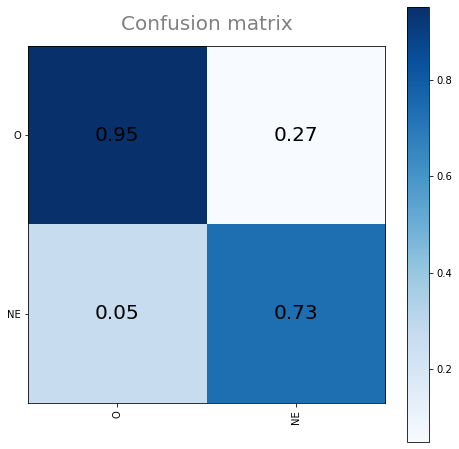

In [ ]:

plt.figure(figsize=(8,8))
plt.imshow(c_mat[1:,1:], cmap='Blues',)
plt.title('Confusion matrix', fontsize=20, color = 'grey', pad=16)
plt.xticks(np.arange(2),labels= list(ternary_vocab.keys())[1:3], rotation = 90)
plt.yticks(np.arange(2),labels= list(ternary_vocab.keys())[1:3])
plt.colorbar()
plt.text(0,0, round(c_mat[1,1],2), fontsize=20,horizontalalignment = 'center',verticalalignment ='center')
plt.text(0,1, round(c_mat[1,2],2), fontsize=20,horizontalalignment = 'center',verticalalignment ='center')
plt.text(1,0, round(c_mat[2,1],2), fontsize=20,horizontalalignment = 'center',verticalalignment ='center')
plt.text(1,1, round(c_mat[2,2],2), fontsize=20,horizontalalignment = 'center',verticalalignment ='center')
plt.savefig('ConfusionMatrix_cl_1.pdf')
plt.show()


### PoS Tagger

In [ ]:
def clean_None(sentence):
  blabla =  [word for word in sentence if word is not None]

  return blabla


In [ ]:

def encode_tag(sentence, vocab):
 
  indices = torch.Tensor([]).to('cuda')
  for w in sentence:
    #print(w)
    #if w is None:
          #indices = torch.cat((indices, torch.Tensor([vocab['<pad>']]).to('cuda')), dim=-1)
    #elif w in vocab: # vocabulary string to integer
    indices = torch.cat((indices, torch.Tensor([vocab[w]]).to('cuda')), dim=-1)

  return indices

def vocab_itos(data_index, vocab):
  words = [vocab[index] for index in data_index.tolist() ]

  return words

def clean(sentence):
  blabla =  [word for word in sentence if word is not '<pad>']

  return blabla

def add_None(window_size, sentence):
  if len(sentence) is not window_size:
    sentence = sentence + ['<pad>']*(window_size - len(sentence))

  return sentence

def PoStagger(window_size, sentence, vocab, tag_vocab):
  sentence = vocab_itos(sentence, vocab)
  sentence = clean(sentence)

  tags = [tag for word, tag in pos_tag(sentence)]
  tags = add_None(window_size, tags)
  tags_idx = encode_tag(tags, tag_vocab)
  return tags_idx


In [ ]:
print(train_set.data[3123])

{'sentence': ['.', 'union', 'foreign', None, None, None, None, None, None, None, None, None], 'label': ['O', 'I-GRP', 'O', None, None, None, None, None, None, None, None, None]}


In [ ]:
def tag_vocab(data):
    PAD_TOKEN = "<pad>"
    vocab = {PAD_TOKEN: 0}
    i = 1  
    for j in range(len(data)):
      for word, tag in pos_tag(clean_None(data[j]['sentence'])):  
        if tag not in vocab:
          vocab[tag] = len(vocab)
          i += 1
    print('Total number of words in vocabulary is : ', i)
    return vocab

tag_vocabulary = tag_vocab(train_set.data)

Total number of words in vocabulary is :  44


##Second step classifier

In [ ]:
from numpy.ma.core import outerproduct
class Model(nn.Module):
    def __init__(self,
                hparams,
                glove,
                trainer_1,
                vocab,
                tag_vocab,
                window_size 
                 ):
        self.window_size = window_size
        self.vocab = vocab
        self.vocab_itos = list(vocab.keys())
        self.tag_vocab = tag_vocab
        super(Model,self).__init__()
        #self.embedding = nn.Embedding(hparams.vocab_size, hparams.embedding_dim, scale_grad_by_freq = False, padding_idx = 0, device = 'cuda')
        self.lstm = nn.LSTM( 100, hparams.lstm_hid_size, hparams.nLayers, bidirectional = hparams.bidirectional, device ='cuda')
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.25)
        self.dropout3 = nn.Dropout(0.25)
        self.dropout4 = nn.Dropout(0.25)
        #self.lin = nn.Linear(hparams.lstm_hid_size*2+1, hparams.fc_size)
        self.lin1 = nn.Linear(hparams.lstm_hid_size*2 if hparams.bidirectional is True else hparams.lstm_hid_size, hparams.fc1_size)
        self.lin2 = nn.Linear( hparams.fc1_size,  hparams.fc2_size)
        self.lin3 = nn.Linear( hparams.fc2_size+3+1, 14)
      
        self.out = nn.Sigmoid()
    def forward(self, input):
        
        x1_logits, x1_pred = trainer_1.predict(input)
        x1_logits = nn.Softmax(dim=-1)(x1_logits)

        x_tags=torch.FloatTensor([]).to('cuda')

        for sentence in input:
          ble = PoStagger(input.size()[-1], sentence, self.vocab_itos, self.tag_vocab).unsqueeze(0)
          x_tags = torch.cat((x_tags, ble),dim=0)
        x_tags = x_tags.unsqueeze(-1)
        
        embeddings = glove(input)
        #x = torch.cat((x_tags, embeddings), dim=-1)
         
        x, (h, c) = self.lstm(embeddings)
        x = self.dropout1(x)
        #x = torch.cat((x_tags, x), dim=-1)

        x = nn.Tanh()(self.lin1(x))
        
        x = self.dropout2(x)
         
        x = nn.Tanh()(self.lin2(x))
        x = torch.cat((x1_logits, x), dim=-1)
        x = torch.cat((x_tags, x), dim=-1)
        
        logits = self.lin3(x)
        
        #output = self.out(logits)
        return logits


##Control panel

##Hyperparameters

In [ ]:
class HParams():
    lstm_hid_size = 200
    nLayers = 2
    fc1_size = 80
    fc2_size = 40
    #fc3_size = 20
    bidirectional = True
params = HParams()
model = Model(params, glove, trainer_1, vocab = glove_vocab, tag_vocab = tag_vocabulary, window_size = WINDOW_SIZE ).cuda()

In [ ]:

n_param=0
for parameter in model.parameters():
  if parameter.requires_grad:
    n_param += parameter.numel()
    print(parameter.numel())

print()
print('tot number of parameters:', n_param)

80000
160000
800
800
80000
160000
800
800
320000
160000
800
800
320000
160000
800
800
32000
80
3200
40
616
14

tot number of parameters: 1482350


In [ ]:
freq_w = np.insert(freq, 0, 1E10)
print(freq_w)
weights = tensor(np.ones(14)/freq_w).type(torch.float32).cuda()
print(weights)

[10000000000      192841        6084        5805        5716        5090
        4556        3551        3375        2987        2975        2770
        2598        1710]
tensor([1.0000e-10, 5.1856e-06, 1.6437e-04, 1.7227e-04, 1.7495e-04, 1.9646e-04,
        2.1949e-04, 2.8161e-04, 2.9630e-04, 3.3478e-04, 3.3613e-04, 3.6101e-04,
        3.8491e-04, 5.8480e-04], device='cuda:0')


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
count_parameters(model)


1482350

In [ ]:
for name, param in model.named_parameters():
  print('name:',name,'\t\t\t\t', 'n_parameters:',param.size())
print('')  
print('tot_parameters:', count_parameters(model))  

name: lstm.weight_ih_l0 				 n_parameters: torch.Size([800, 100])
name: lstm.weight_hh_l0 				 n_parameters: torch.Size([800, 200])
name: lstm.bias_ih_l0 				 n_parameters: torch.Size([800])
name: lstm.bias_hh_l0 				 n_parameters: torch.Size([800])
name: lstm.weight_ih_l0_reverse 				 n_parameters: torch.Size([800, 100])
name: lstm.weight_hh_l0_reverse 				 n_parameters: torch.Size([800, 200])
name: lstm.bias_ih_l0_reverse 				 n_parameters: torch.Size([800])
name: lstm.bias_hh_l0_reverse 				 n_parameters: torch.Size([800])
name: lstm.weight_ih_l1 				 n_parameters: torch.Size([800, 400])
name: lstm.weight_hh_l1 				 n_parameters: torch.Size([800, 200])
name: lstm.bias_ih_l1 				 n_parameters: torch.Size([800])
name: lstm.bias_hh_l1 				 n_parameters: torch.Size([800])
name: lstm.weight_ih_l1_reverse 				 n_parameters: torch.Size([800, 400])
name: lstm.weight_hh_l1_reverse 				 n_parameters: torch.Size([800, 200])
name: lstm.bias_ih_l1_reverse 				 n_parameters: torch.Size([800])
nam

In [ ]:
#ignore_index=label_vocabulary['<pad>']
#weight = weights
trainer = Trainer(
    model = model,
    loss_function = nn.CrossEntropyLoss(),
    optimizer = optim.Adam(model.parameters(),lr = 0.0001),
    label_vocab=label_vocabulary
)

In [ ]:
print(len(train_set.encoded_data))
print(len(val_set.encoded_data))

123515
6554


In [ ]:
train_sample = DataLoader(train_set.encoded_data, batch_size = 10, shuffle = True)
val_sample = DataLoader(val_set.encoded_data, batch_size = 10, shuffle = False)


In [ ]:
trainer.train(train_sample, val_sample, 40) 

In [ ]:
torch.save(model.state_dict(), 'NER_classifier_2_weights.pth')

In [ ]:
model

In [ ]:
y_logits, y_pred = trainer.predict(val_set.OriginalData_encoded[0]['inputs'].unsqueeze(0))
y_pred = y_pred.view(-1)
y_real = val_set.OriginalData_encoded[0]['outputs']

print(y_pred)
print(y_real)

print(y_pred.size())
print(y_real.size())


for i in range(1 , len(val_set.OriginalData_encoded)):
  y_logits_tmp, y_pred_tmp = trainer.predict(val_set.OriginalData_encoded[i]['inputs'].unsqueeze(0))
  y_pred_tmp = y_pred_tmp.view(-1)
  y_pred = torch.cat((y_pred, y_pred_tmp), -1)
  y_real_tmp = val_set.OriginalData_encoded[i]['outputs']
  assert len(y_pred_tmp) == len(y_real_tmp)
  y_real = torch.cat((y_real,y_real_tmp), 0)


print(y_pred.view(-1))
print()
print(y_real.view(-1))

print(f1_score(torch.Tensor.cpu(y_pred.view(-1)), torch.Tensor.cpu(y_real.view(-1)), labels=np.arange(1, 14), average='macro'))
y_real = torch.Tensor.cpu(y_real)
y_pred = torch.Tensor.cpu(y_pred)
print(F1Score(14, multiclass=True, average='macro')(y_pred.view(-1), y_real.view(-1)), )
c_mat2 = confusion_matrix(torch.Tensor.cpu(y_pred.view(-1)), torch.Tensor.cpu(y_real.view(-1)), normalize = 'true')




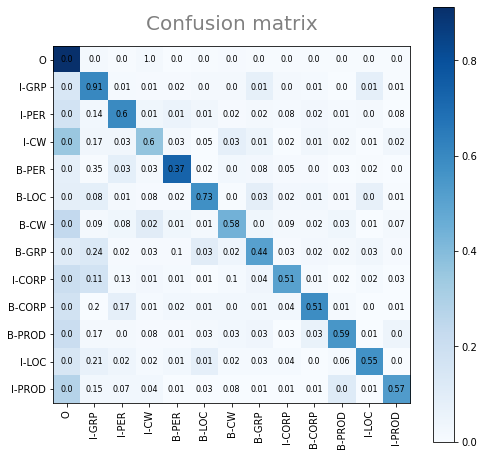

In [103]:
plt.figure(figsize=(8,8))
plt.imshow(c_mat2[1:,1:], cmap='Blues')
plt.title('Confusion matrix', fontsize=20, color = 'grey', pad=16)
plt.xticks(np.arange(13),labels= list(label_vocabulary.keys())[1:], rotation = 90 )
plt.yticks(np.arange(13),labels= list(label_vocabulary.keys())[1:] )
plt.colorbar()
for i in range(13):
  for j in range(13):
    plt.text(i,j, round(c_mat2[j,i], 2), horizontalalignment = 'center', verticalalignment = 'center', fontsize=8)
plt.savefig('ConfusionMatrix_cl_2.pdf')
plt.show()

In [ ]:
x=np.arange(11)
plt.figure(figsize=(10,6))
plt.title('Loss', color = 'grey', fontsize=24)
plt.plot(x, trainer.train_loss_list, label = 'Training loss', color = 'salmon')
plt.plot(x, trainer.valid_loss_list, label = 'Validation loss', color = 'lightseagreen')
plt.legend(loc ='upper right')
plt.xlabel('epoch')
plt.ylabel('Cross-Entropy loss')
plt.savefig('loss_trending.pdf')
plt.show()

In [ ]:
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk import corpus

In [ ]:
all_tag = ['CC','CD','DT','EX','FW','IN','JJ','JJR','JJS','LS','MD','NN ','NNS','NNP','NNPS','PDT','POS','PRP','PRP$','RB','RBR','RBS','RP','TO','UH','VB','VBD','VBG','VBN','VBP','VBZ','WDT','WP','WP$','WRB']



In [ ]:
file1 = open("Words_Vocab.json", "w")
json.dump(glove_vocab, file1)
file1.close()

In [ ]:
file2 = open('label_Vocab.json', 'w')
json.dump(label_vocabulary, file2)
file2.close()

In [ ]:
file3 = open('PoStag_Vocab.json', 'w')
json.dump(tag_vocabulary, file3)
file3.close()

In [ ]:
file4 = open('ter_vocab.json', 'w')
json.dump(ternary_vocab, file4)
file4.close()